*** Exploratory Data Analysis (EDA) on Titanic  ***

 This project analyzes the Titanic dataset to understand the factors that influenced passenger survival. The dataset contains information about passengers, such as age, gender, class, and whether they survived or not.

Step 1: Import **Libraries**

First, we import the necessary Python libraries for data analysis and visualization.

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Step 2: ***Load the Dataset***

We load the Titanic dataset into a Pandas DataFrame.

In [10]:
# Load the dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Display the first 5 rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Step 3: *** Understand the Dataset ***

Let's explore the dataset to understand its structure and contents.

In [11]:
# Check the shape of the dataset (rows, columns)
df.shape
# Get basic information about the dataset
df.info()
# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Step 4: *** Data Cleaning ***

We handle missing values and clean the dataset for analysis.

In [15]:
# Fill missing 'Age' values with the median age
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the most common value
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop the 'Cabin' column as it has too many missing values
# Check if 'Cabin' column exists before dropping
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)

# Verify if missing values are handled
df.isnull().sum()

<ipython-input-15-a6f546a3de10>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-15-a6f546a3de10>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Step 5: *** Exploratory Data Analysis (EDA) ***

Now, let's analyze the data to uncover insights.

1. ***Survival Rate***

In [16]:
# Calculate the survival rate
survival_rate = df['Survived'].mean()
print(f"Survival Rate: {survival_rate * 100:.2f}%")

Survival Rate: 38.38%


2. ***Survival by Gender***

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


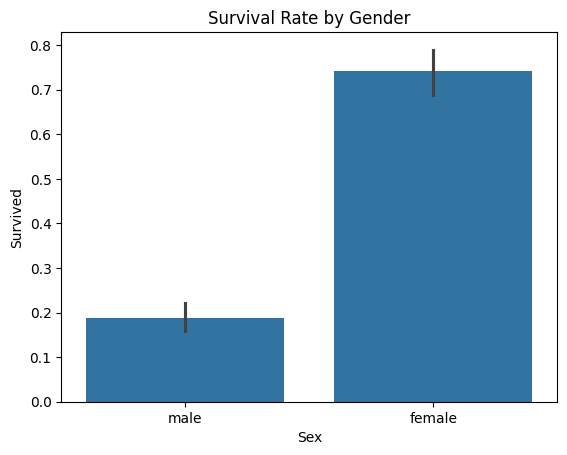

In [17]:
# Group by 'Sex' and calculate survival rate
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print(survival_by_gender)

# Visualize survival by gender
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

3. ***Survival by Passenger Class***

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


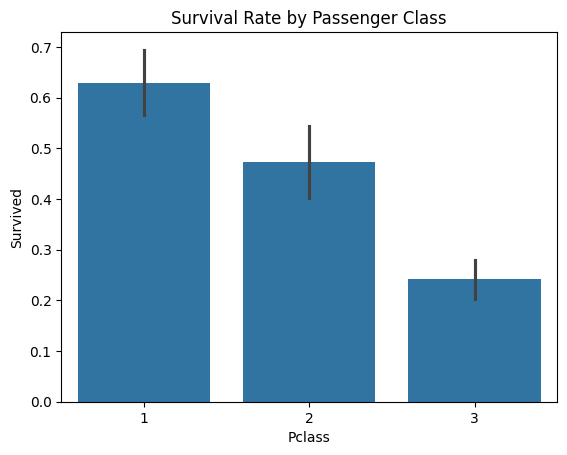

In [18]:
# Group by 'Pclass' and calculate survival rate
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

# Visualize survival by class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.show()

4. ***Age Distribution***

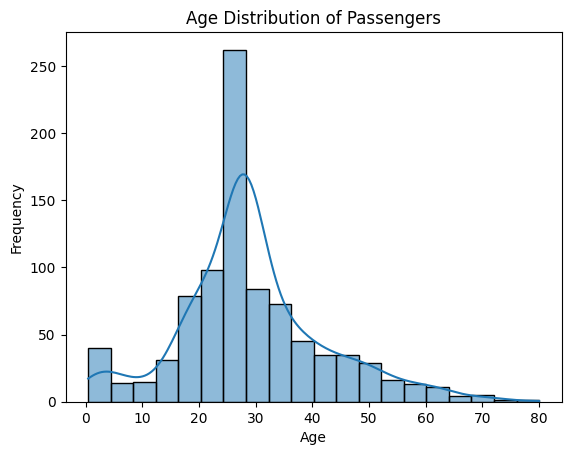

In [19]:
# Plot the distribution of passenger ages
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

5. ***Survival by Age***

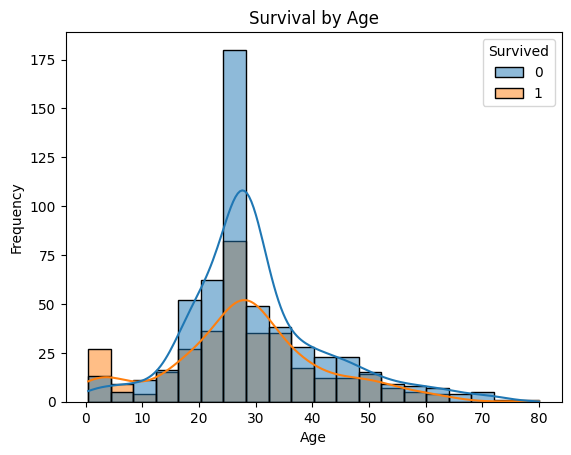

In [20]:
# Visualize survival by age
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=True)
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

6. ***Correlation Heatmap***

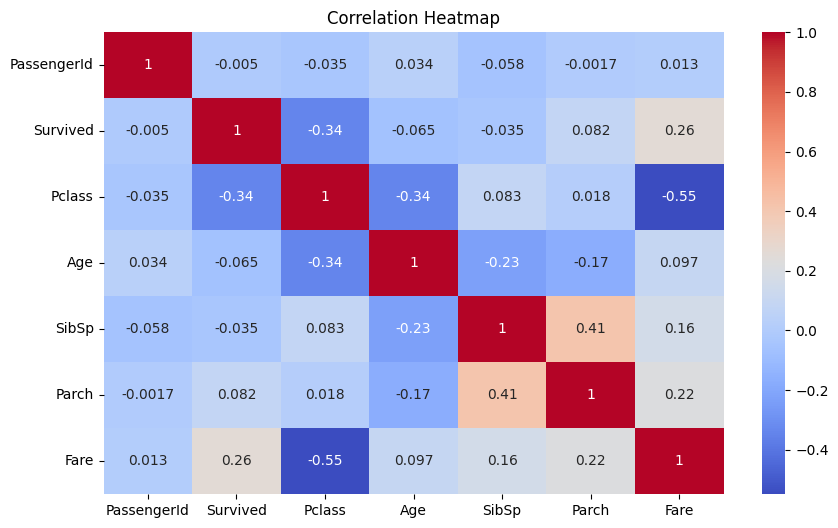

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns from the dataframe
df_numeric = df.select_dtypes(include=['number'])

# Plot a correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Step 6: **Insights and Conclusion**

Based on the analysis, we can draw the following conclusions:



*   **Survival Rate**: Approximately 38% of passengers survived.
*   **Gender**: Female passengers had a significantly higher survival rate than males.


*   **Passenger Class**: Passengers in first class had a higher survival rate compared to those in second and third classes.


*   **Age**: Younger passengers (children) had a higher chance of survival.
*   **Correlation**: Features like Pclass and Fare are positively correlated with survival.


